## Introduction

In the fast-paced world of banking, keeping customers happy and loyal is key. But with more customers leaving credit card services, bank managers are feeling the pressure. They're not just looking for insights—they want proactive solutions to prevent churn and maintain strong relationships.

Our mission is to forecast customer churn and equip banks with preemptive measures. We'll leverage a dataset containing information from 10,000 customers, including their age, salary, marital status, credit card limit, and card category etc .sourced from Kaggle. This rich dataset will serve as our foundation as we strive to gain valuable insights and construct a predictive model capable of forecasting customer churn."

dataset: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/download?datasetVersionNumber=1

In [1]:
#loadng dependancies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
from sklearn.model_selection import train_test_split

In [2]:
# loading datset
df=pd.read_csv(r"C:\Users\Hp\Downloads\chunners.csv")
df.head()

,,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
# shape
df.shape

(10127, 21)

In [4]:
df.columns

Index([' ', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0                             10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [6]:
df.isnull().sum()

                            0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [7]:
df.duplicated().any()


False

In [8]:
# get rid of unncessesary columns
df=df[df.columns[1:]]

## Data Exploration

In [9]:
# descriptive statistics numeric columns
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [10]:
df.describe(include='object').T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


## Univariate Analysis

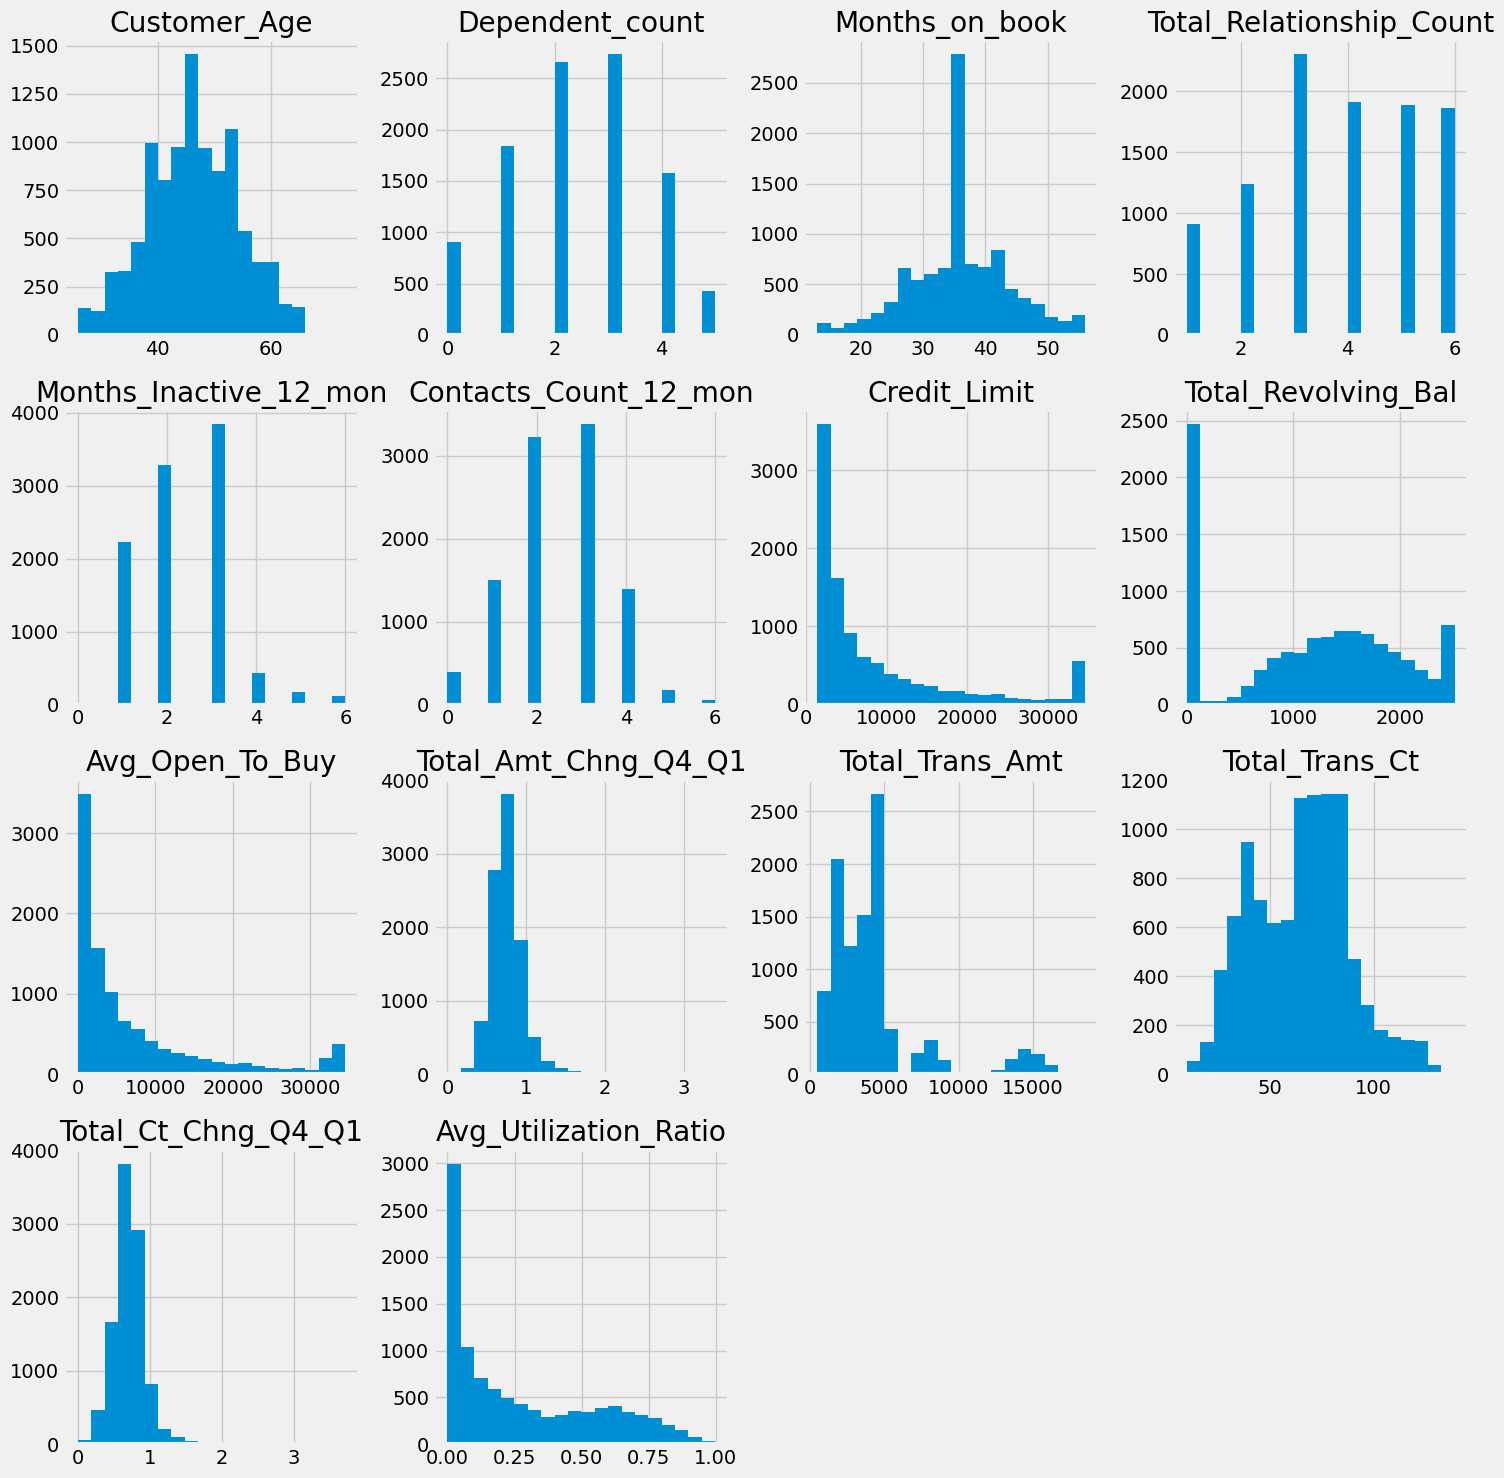

In [11]:
numerical_cols=df.select_dtypes(include='number').columns.tolist()
df[numerical_cols].hist(figsize=(15,15),bins=20)
plt.tight_layout() # adjust layout to prevent overlapping
plt.show()

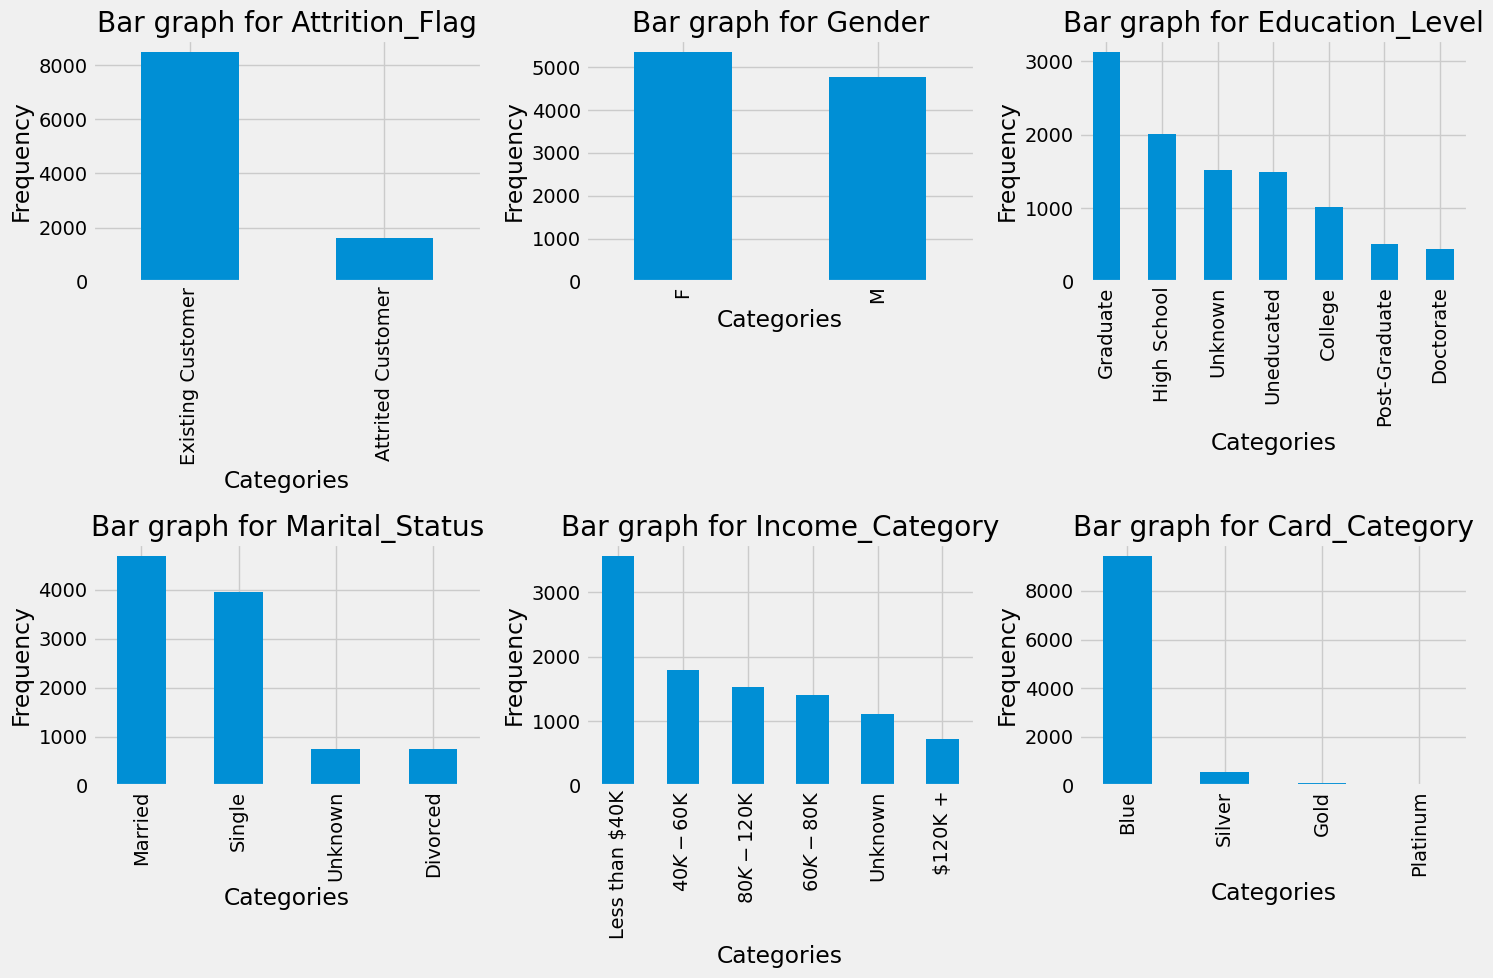

In [12]:
cat_cols=df.select_dtypes(include='object').columns.tolist()

num_rows=len(cat_cols)//3
if len(cat_cols) %3 !=0:
    num_rows += 1
fig,axes=plt.subplots(num_rows,3,figsize=(15,5*num_rows))
axes=axes.flatten()
for i,cols in enumerate(cat_cols):
    ax=axes[i]
    cat_counts=df[cols].value_counts()
    cat_counts.plot(kind='bar',ax=ax)
    
    ax.set_title(f'Bar graph for {cols}')
    ax.set_xlabel('Categories')
    ax.set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

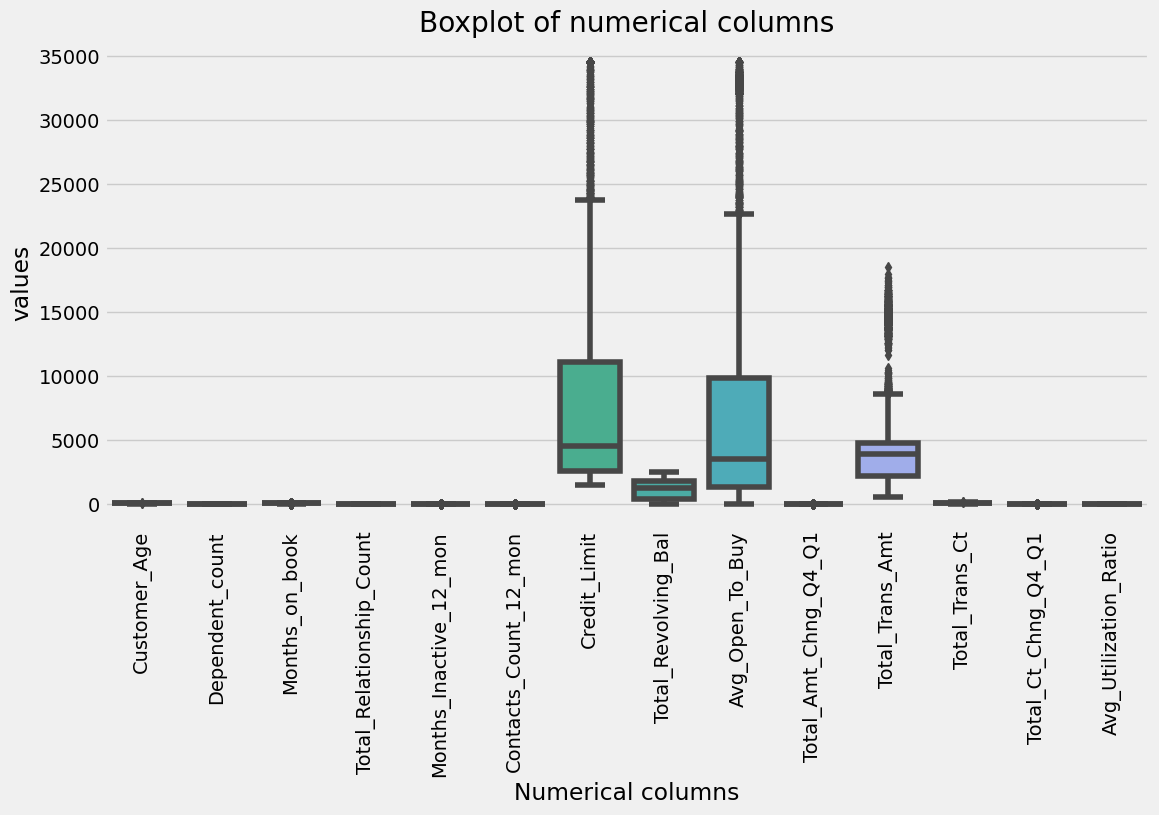

In [13]:
# Box plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot of numerical columns')
plt.xlabel('Numerical columns')
plt.ylabel('values')
plt.xticks(rotation=90)
plt.show()

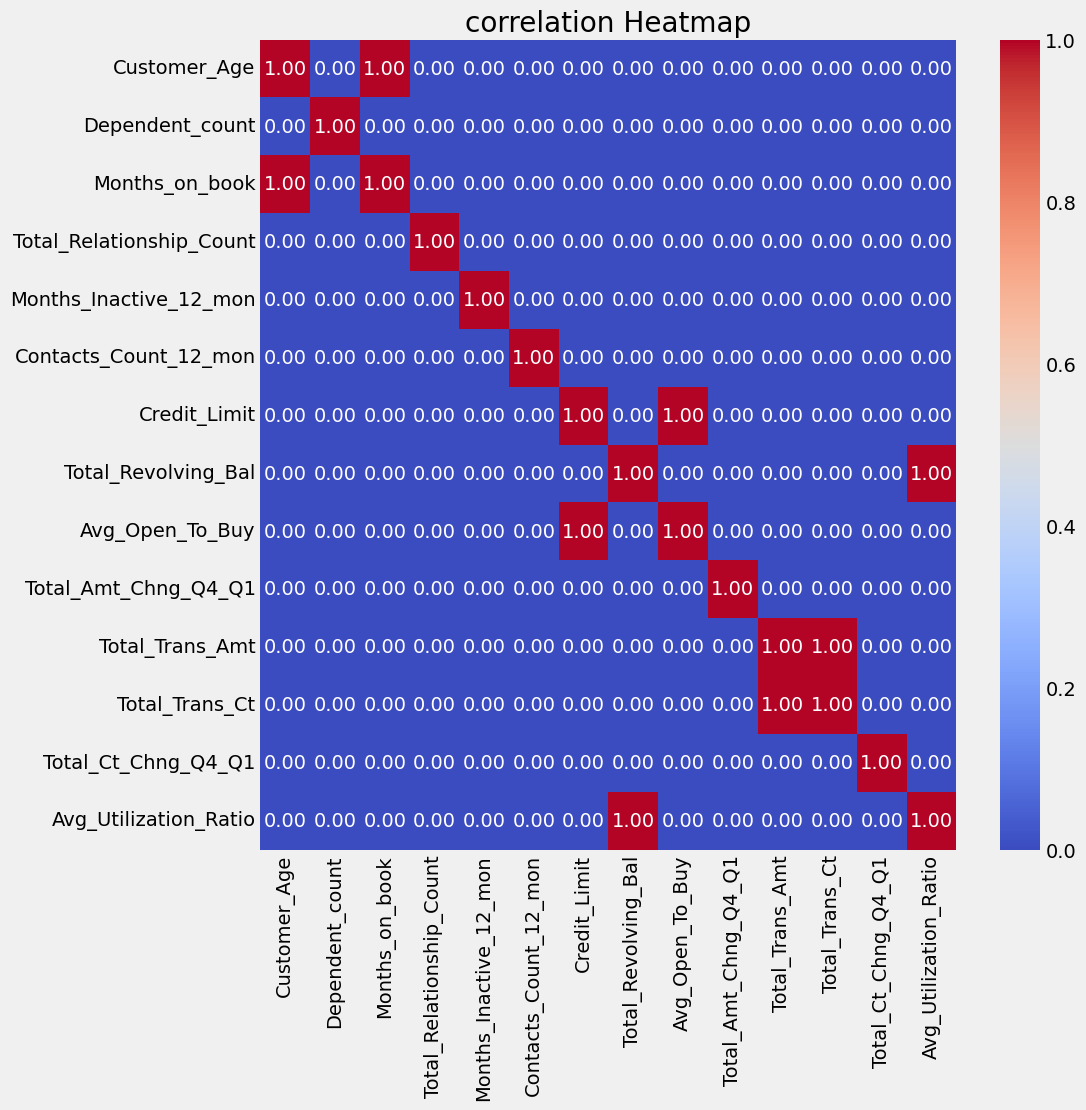

In [14]:
correlation_matrix=df[numerical_cols].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix>0.5,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('correlation Heatmap')
plt.show()

## Data Preprocessing

1. convert all categorical variables to numerical using Label encoding and one hot encoding
2. perform train_test_split 


In [15]:
from sklearn.preprocessing import LabelEncoder

# use label encoder to encode Attrition flag &
encoder=LabelEncoder()
df['Attrition_Flag']=encoder.fit_transform(df['Attrition_Flag'])
df['Gender']=encoder.fit_transform(df['Gender'])

# Use one hot encoding for Education_Level ,Marital_Status,Income_Category,Card_Category 
# set drop firstto True to avoid multi collinearity
df=pd.get_dummies(df,drop_first=True)
print(df.head())

   Attrition_Flag  Customer_Age  Gender  Dependent_count  Months_on_book  \
0               1            45       1                3              39   
1               1            49       0                5              44   
2               1            51       1                3              36   
3               1            40       0                4              34   
4               1            40       1                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  ...  Marital_Status_Single  \
0     

In [16]:
X=df.drop('Attrition_Flag',axis=1)
y=df['Attrition_Flag']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)

## Building model

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RF=RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)
accuracy_score(y_test,y_pred)

0.9615004935834156

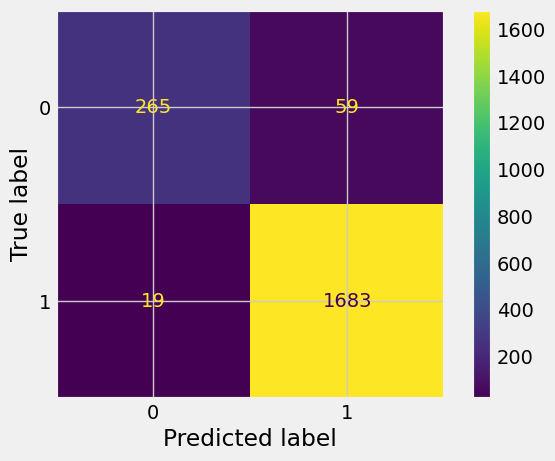

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.style as styles

conf_matrix=confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()

## Feature Importance

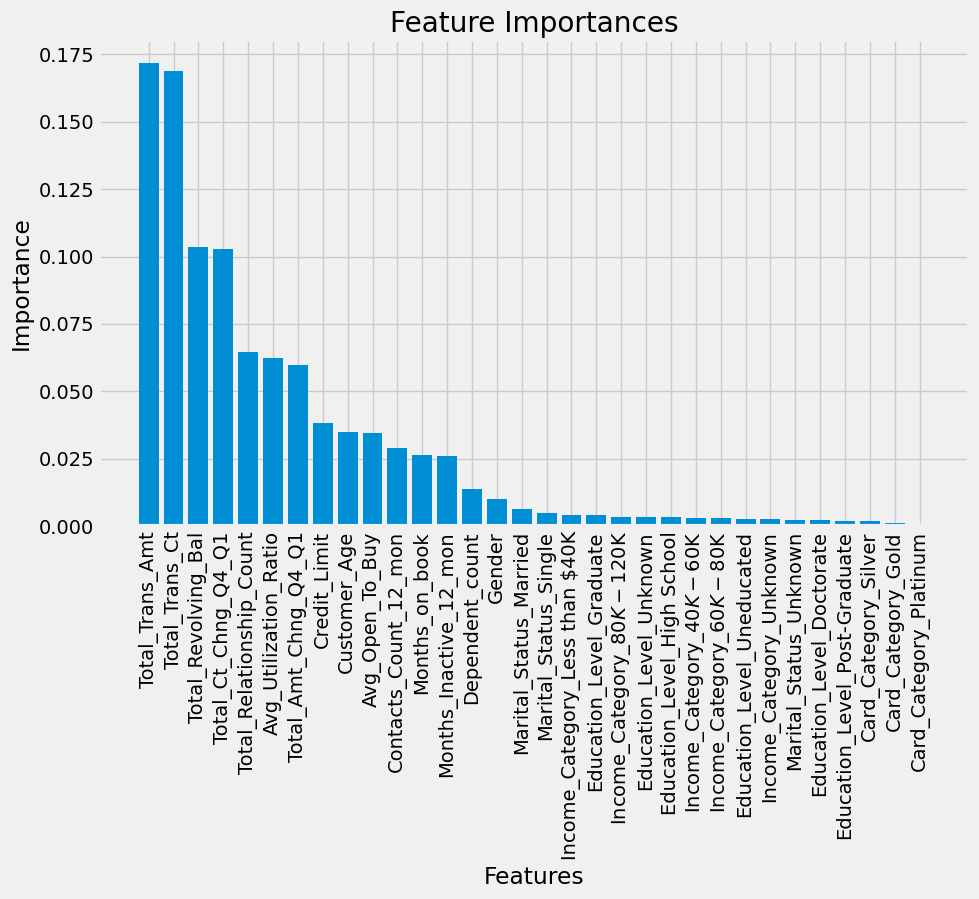

In [20]:
feature_importances=RF.feature_importances_
# Sort in descending order
sorted_indices=np.argsort(feature_importances)[::-1]
# get feature names
feature_names=list(X.columns)
# plot feature importances
plt.figure(figsize=(10,6))
plt.bar(range(X.shape[1]),feature_importances[sorted_indices],align='center')
plt.xticks(range(X.shape[1]),[feature_names[i] for i in sorted_indices],rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

The analysis revealed three key features that strongly influence customer churn. Total transaction Amount, Total transaction Count and Total Revolving balance. The total transaction Amount signifies the overall monetray value of transactions made by customers, indicating that those with higher tranasction amount are less likely to churn. Total transaction count highlights the frequency of customer transactions more frequent transactions correlates with lower churn rates. Total revolving balance represents the amount of otstanding debt on credit cards , is a significant predictor suggesting that customers with lower revolving balances are more likely to stay. These findings provide valuable insights for targeted retention strategies

## Identifying Churned Customers

In [46]:
churn_probabilities=RF.predict_proba(X_test)[:,1]
# lets use 0.5 as our thresh hold,
threshold=0.5
at_risk_customers=X_test[churn_probabilities<threshold]
at_risk_customers.head()

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
9415,48,1,2,28,1,3,3,14774.0,2517,12257.0,...,0,0,0,0,1,0,0,0,0,0
314,57,1,3,38,2,3,3,8249.0,1381,6868.0,...,0,0,0,0,0,0,0,0,0,0
3000,49,1,3,36,5,2,3,15942.0,0,15942.0,...,0,1,0,1,0,0,0,0,0,0
836,47,0,3,36,5,2,2,7051.0,0,7051.0,...,0,0,0,0,0,1,0,0,0,0
1665,33,1,2,21,2,2,4,27992.0,0,27992.0,...,0,0,0,0,0,0,0,0,0,0


## Demographic Analysis for Churned customers

Text(0.5, 1.0, 'Age distribution')

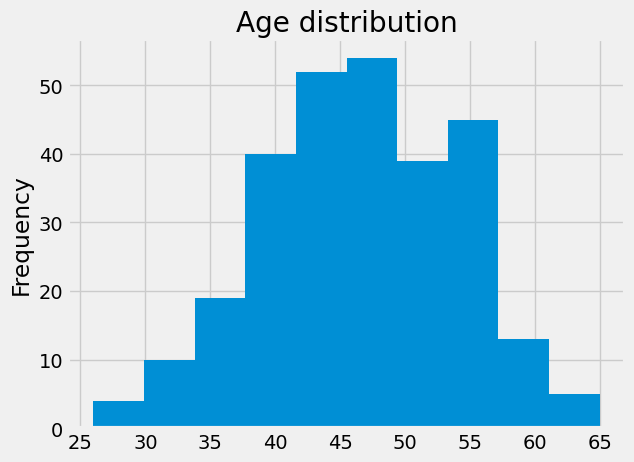

In [59]:
at_risk_customers['Customer_Age'].plot.hist()
plt.title('Age distribution')

Text(0.5, 1.0, 'Gender')

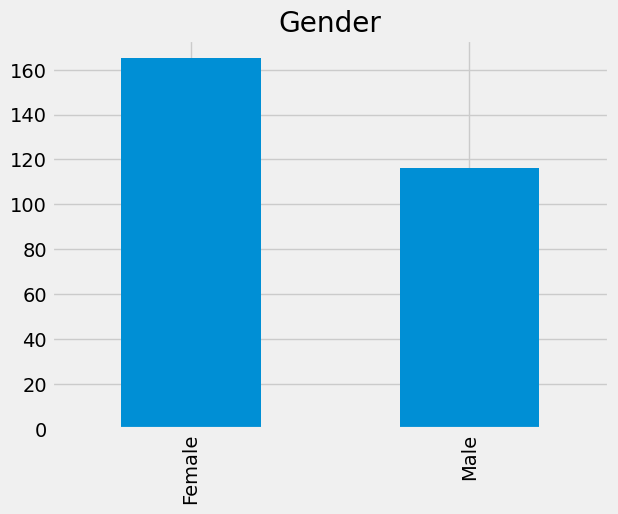

In [58]:
at_risk_customers['Gender'].value_counts().plot.bar()
xtics_positions=[0,1]
xtics_labels=['Female','Male']
plt.xticks(xtics_positions,xtics_labels)
plt.title('Gender')

Text(0.5, 1.0, 'Transaction Amount Distribution')

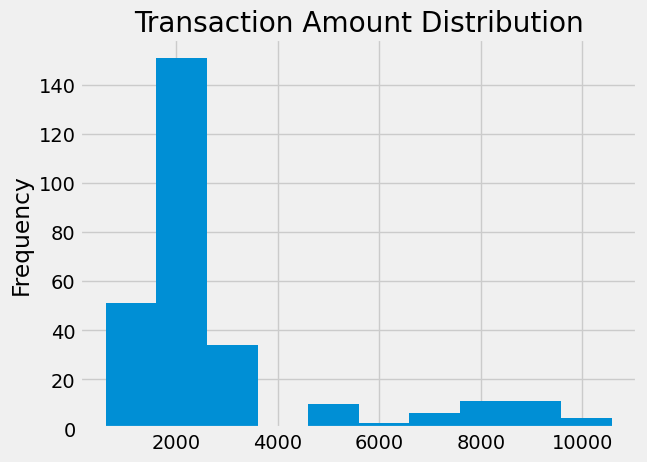

In [60]:
at_risk_customers['Total_Trans_Amt'].plot.hist()
plt.title('Transaction Amount Distribution')

Text(0.5, 1.0, 'Transaction Frequency Distribution')

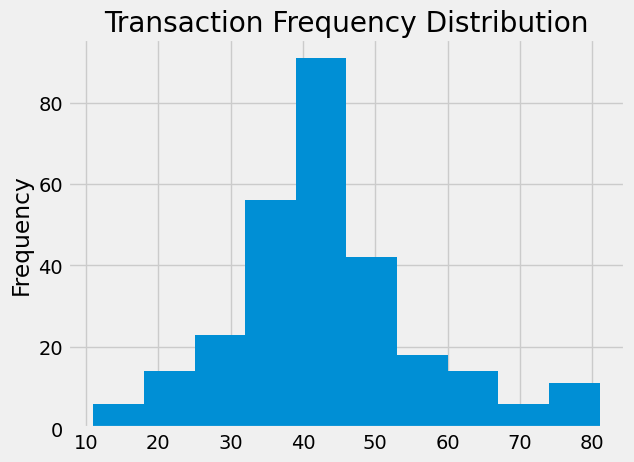

In [62]:
at_risk_customers['Total_Trans_Ct'].plot.hist()
plt.title('Transaction Frequency Distribution')

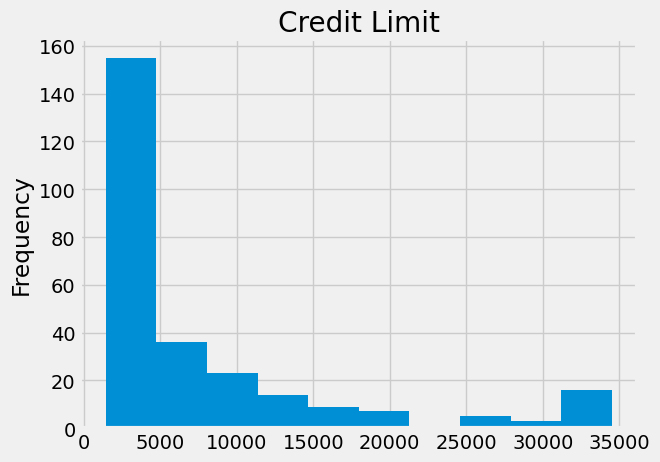

In [26]:
at_risk_customers['Credit_Limit'].plot.hist()
plt.title('Credit Limit')
plt.show()

In [63]:
!jupyter nbconvert --to webpdf --allow-chromium-download Credit_Card_Customer_Churn.ipynb

[NbConvertApp] Converting notebook Credit_Card_Customer_Churn.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 822998 bytes to Credit_Card_Customer_Churn.pdf
